In [1]:
import os
import earthaccess
import rasters as rt
from EMITL2ARFL import *

date range

In [2]:
start_date = "2024-01-01"
end_date = "2024-12-31"

download directory

In [3]:
download_directory = "~/data/EMIT_download"

example spatial area

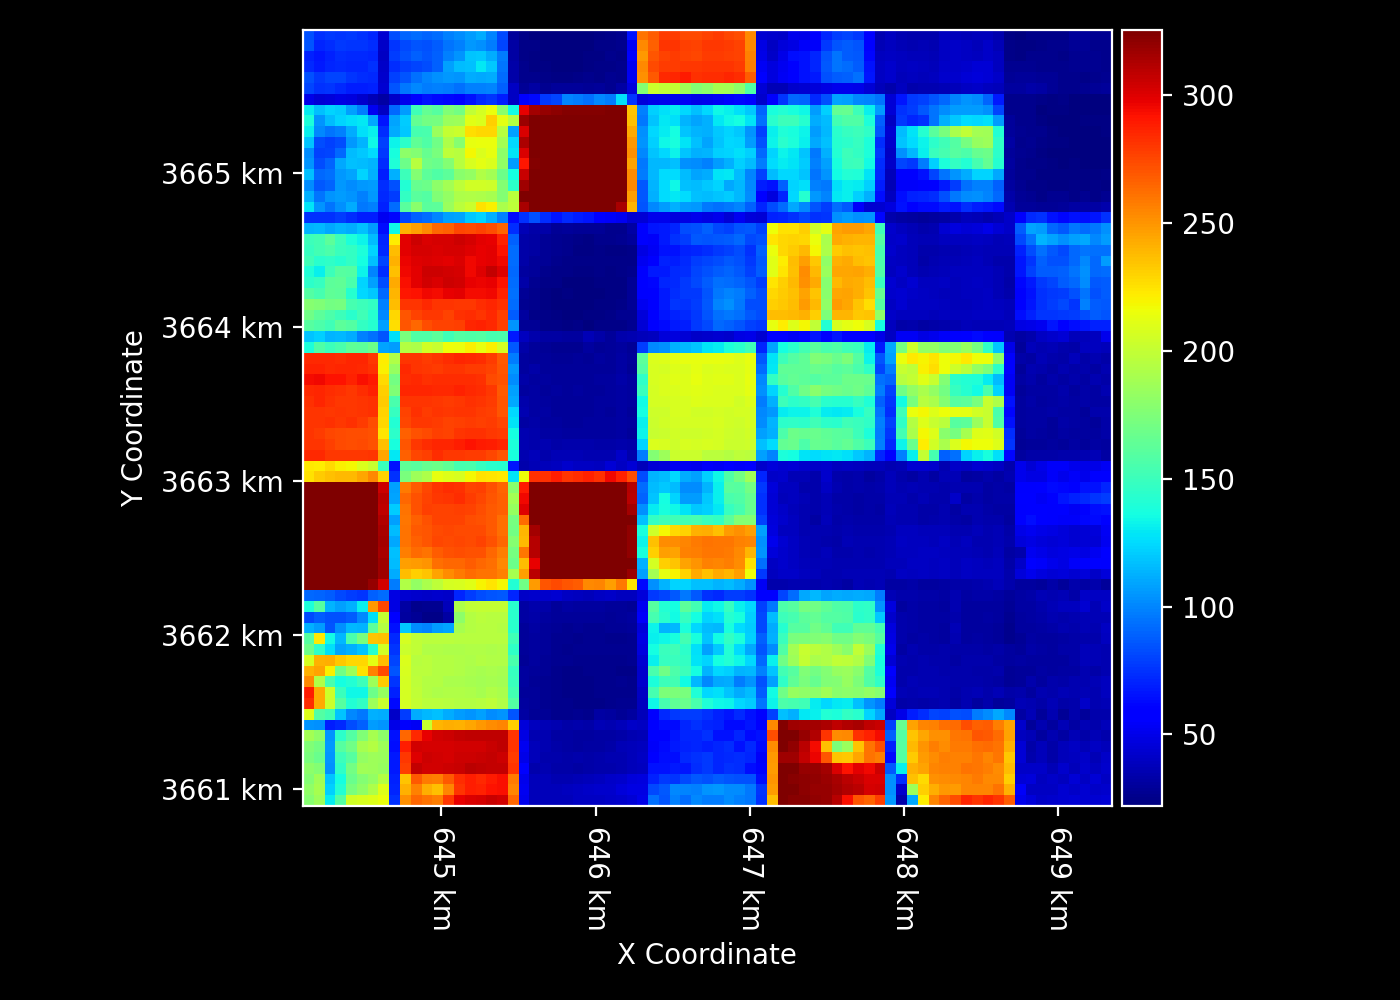

In [4]:
notebook_dir = os.path.dirname(os.path.abspath("Searching EMIT L2A Reflectance with earthaccess.ipynb"))
filename = os.path.join(notebook_dir, "farms_subset.tif")
subset = rt.Raster.open(filename)
subset

In [5]:
geometry = subset.geometry
geometry

{
  "dimensions": {
    "rows": 72,
    "cols": 75
  },
  "bbox": {
    "xmin": 644100.0,
    "ymin": 3660890.0,
    "xmax": 649350.0,
    "ymax": 3665930.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [6]:
earthaccess.login(strategy="netrc", persist=True)

retrieve example granule for orbit 2428011 scene 4

In [7]:
granule = retrieve_EMIT_L2A_RFL_granule(orbit=2428011, scene=4, download_directory=download_directory)
granule

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL(directory="~/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004")

In [8]:
granule.files

['/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc',
 '/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc',
 '/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc']

In [9]:
granule.directory

'~/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004'

In [10]:
granule.reflectance_filename

'/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc'

In [11]:
granule.mask_filename

'/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc'

In [12]:
granule.uncertainty_filename

'/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc'

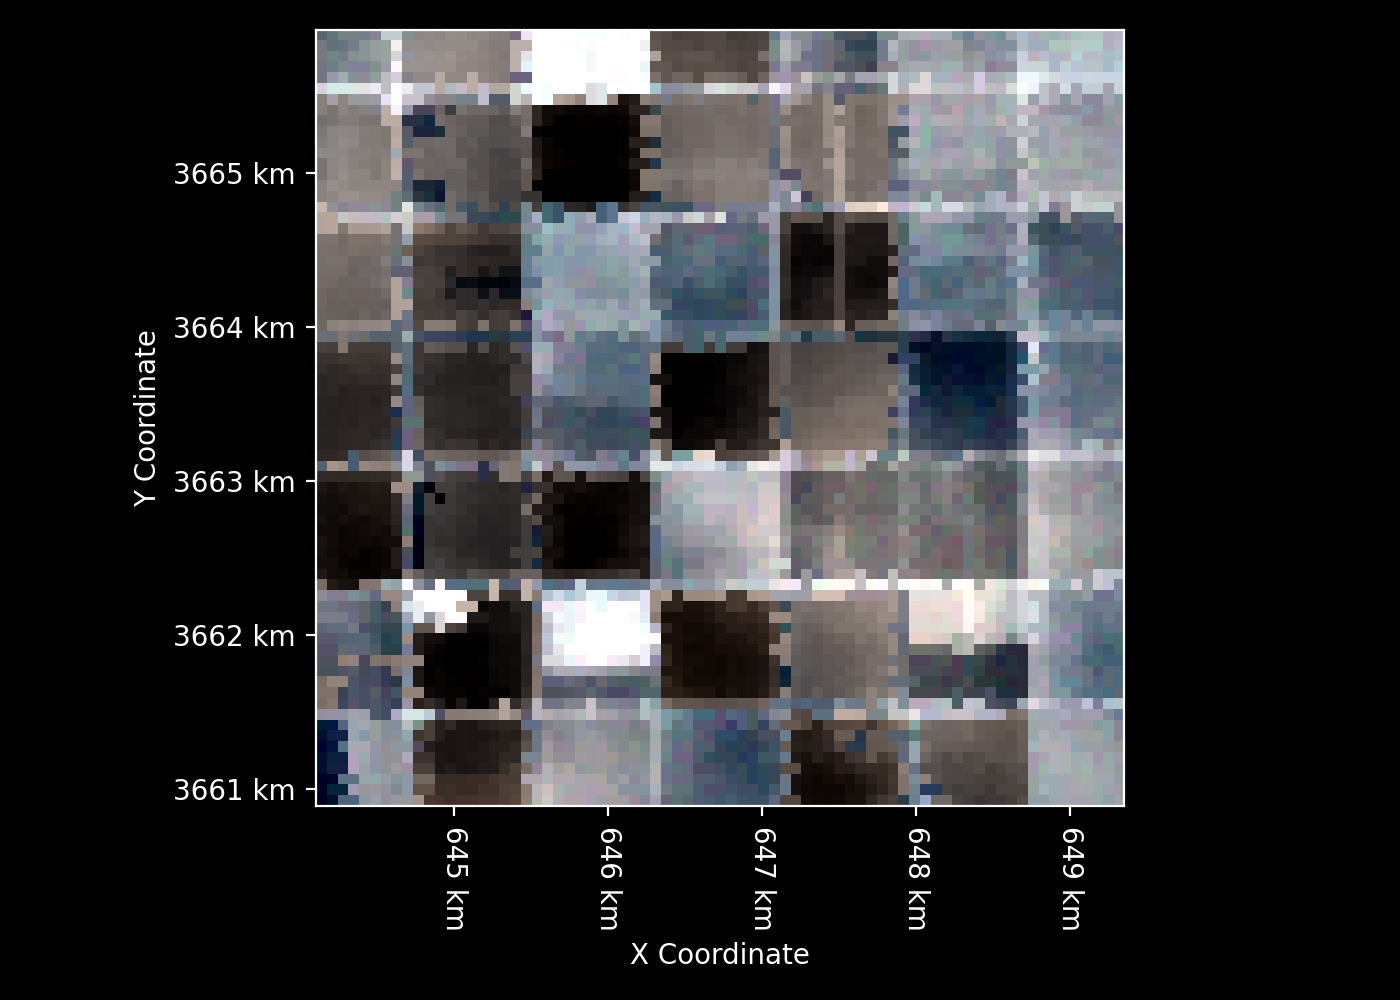

In [13]:
granule.reflectance(geometry=geometry)

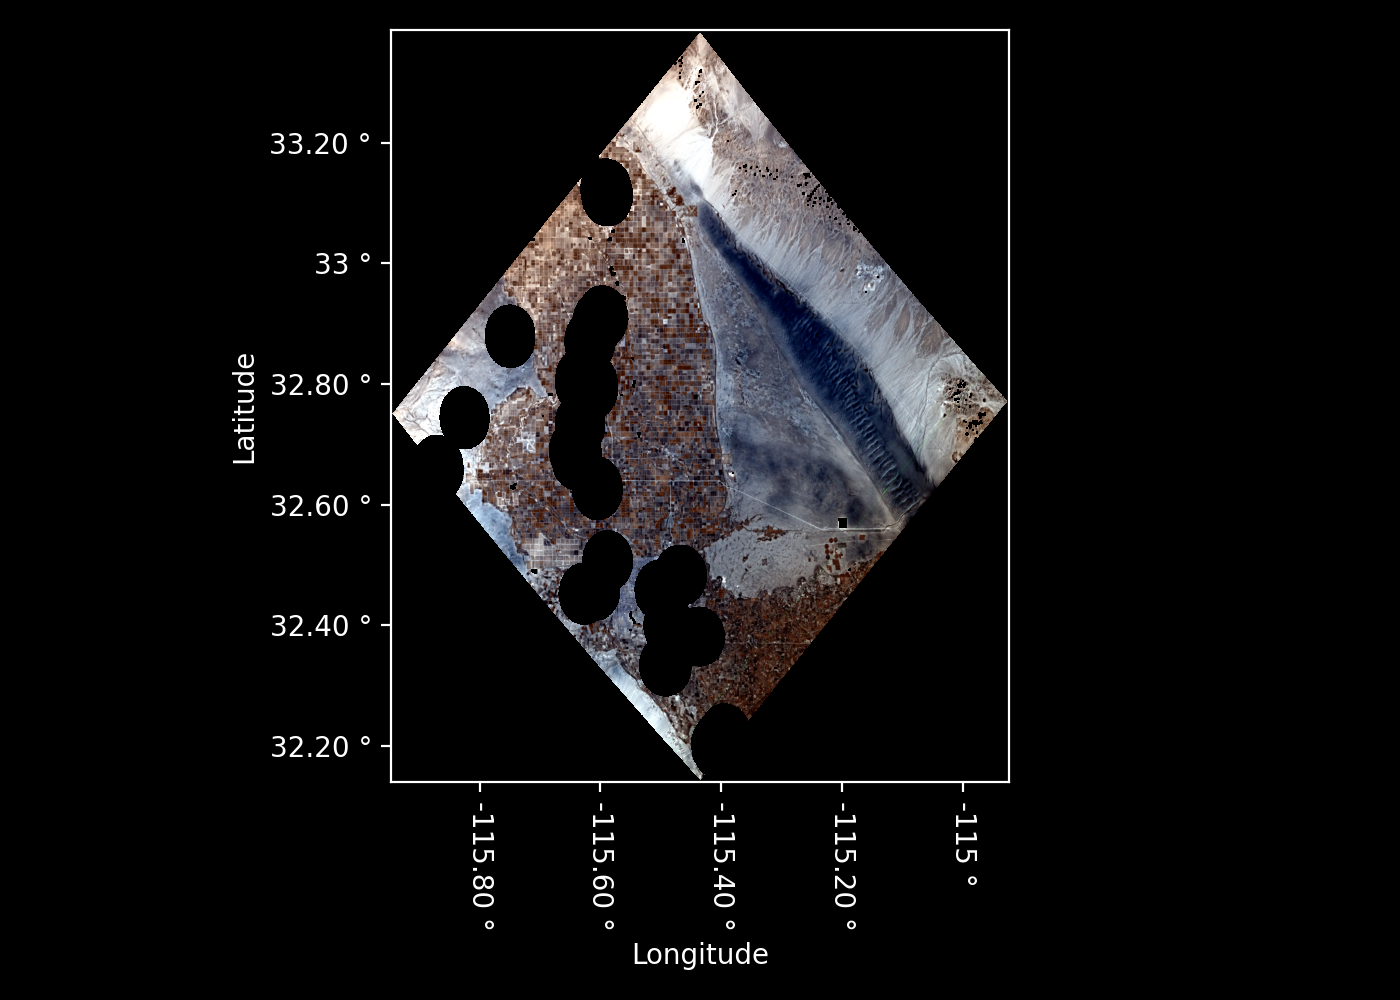

In [14]:
full_granule_reflectance = granule.reflectance()
full_granule_reflectance

In [15]:
full_granule_reflectance.shape

(285, 1886, 2298)

In [16]:
emit_mask = emit_xarray(granule.mask_filename, ortho=True)
emit_mask

<xarray.Dataset> Size: 780MB
Dimensions:      (latitude: 1886, longitude: 2298, mask_bands: 8,
                  packed_wavelength_bands: 36)
Coordinates:
  * mask_bands   (mask_bands) object 64B 'Cloud flag' ... 'Aggregate Flag'
  * latitude     (latitude) float64 15kB 33.39 33.39 33.39 ... 32.37 32.36 32.36
  * longitude    (longitude) float64 18kB -115.9 -115.9 -115.9 ... -114.7 -114.7
    elev         (latitude, longitude) float32 17MB nan nan nan ... nan nan nan
    spatial_ref  int64 8B 0
Dimensions without coordinates: packed_wavelength_bands
Data variables:
    mask         (latitude, longitude, mask_bands) float32 139MB nan nan ... nan
    band_mask    (latitude, longitude, packed_wavelength_bands) float32 624MB ...
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.15946398e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Masks 60 m V001
    granule_id:                        EMIT_L2A_MASK_001_20241006T165200_2428...
    Orthorectified:                    True

In [17]:
qmask = granule.quality_mask()
qmask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1280, 1242), dtype=float32)

In [19]:
type(qmask)

numpy.ndarray

In [20]:
granule.GLT()

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], shape=(1886, 2298, 2))